## Essais de normalisation du contrast

Ce document est un bref panorama des différentes transformation d'intensité auxquelles ont pourrait songer.
Pas besoin de lire le code, les formules/liens sont suffisants

J'ai séléctionné 5 images assez variées en tant qu'exemples


Les images sont : 



Image name : 070525-JPB-MEB-EIHNValves-Ech6-ZigZag0074.tif 
 _________________________


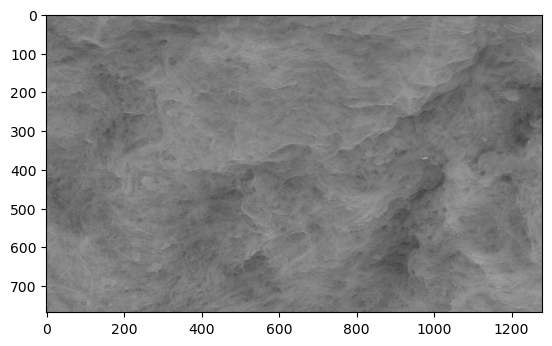

Image name : 060722-Nabila-JP-Valves-WholeMount-SAureus-pat02-28.tif 
 _________________________


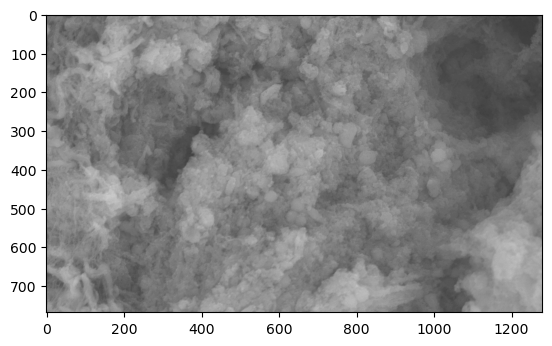

Image name : 070525-JPB-MEB-EIHNValves-Ech5-ZigZag0015.tif 
 _________________________


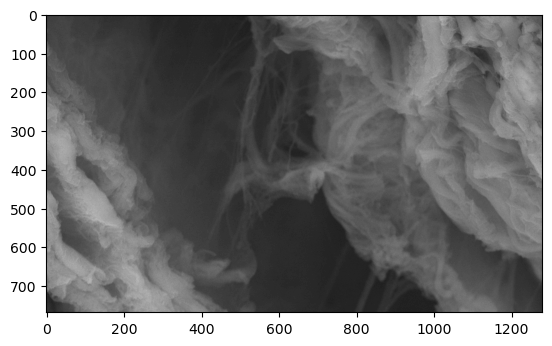

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0081.tif 
 _________________________


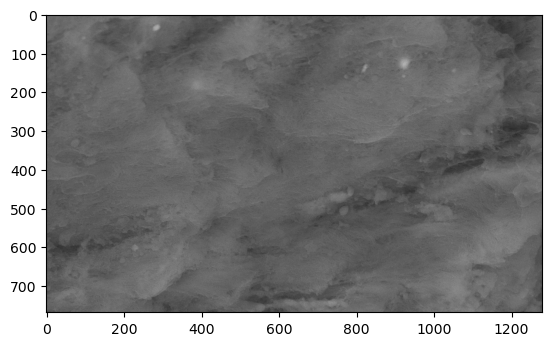

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0011.tif 
 _________________________


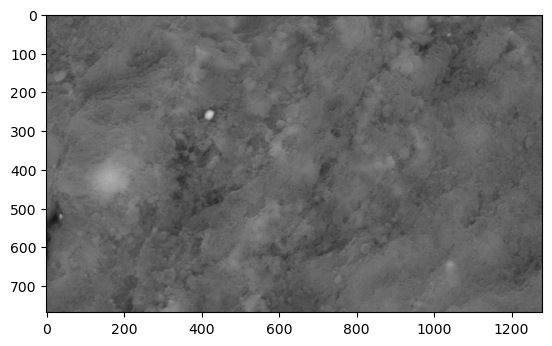

In [19]:
import os 
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt 


data_folder="/home/adrienb/Documents/Adrien/datasets/DatasetDemo/ExempleContrast"
for im in os.listdir(data_folder) : 
    print("Image name : {} \n _________________________".format(im))
    i=np.array(Image.open(os.path.join(data_folder,im)))
    plt.imshow(i,cmap="gray",vmin=0,vmax=255)
    plt.show()
    


def plot_exemples(data_folder, transform : callable): 
            
        for im in os.listdir(data_folder):
            print(f"Image name : {im}\n_________________________")
            
            i = np.array(Image.open(os.path.join(data_folder, im)).convert("L"))
            i_transform = np.array(transform(i))

        
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            axs[0].imshow(i, cmap="gray", vmin=0, vmax=255)
            axs[0].set_title("Image d'origine")
            axs[0].axis("off")
            axs[1].hist(i.ravel(), bins=256, range=(0, 255), color='gray')
            axs[1].set_title("Histogramme original")
            plt.tight_layout()
            plt.show()

            
            fig, axs = plt.subplots(1, 2, figsize=(10, 4))
            axs[0].imshow(i_transform, cmap="gray", vmin=0, vmax=255)
            axs[0].set_title("Image transformée")
            axs[0].axis("off")
            axs[1].hist(i_transform.ravel(), bins=256, range=(0, 255), color='gray')
            axs[1].set_title("Histogramme transformé")
            plt.tight_layout()
            plt.show()


### Histogram stretching

Avec ce traitement, on tente de rendre plus d'informations perceptibles en étalant l'histogramme sur toute la plage 8bits.


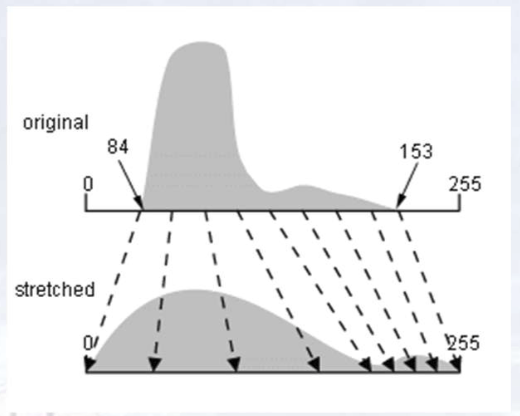

$$
I_{\text{new}} = \frac{I - I_{\min}}{I_{\max} - I_{\min}} \times 255
$$


Image name : 070525-JPB-MEB-EIHNValves-Ech6-ZigZag0074.tif
_________________________


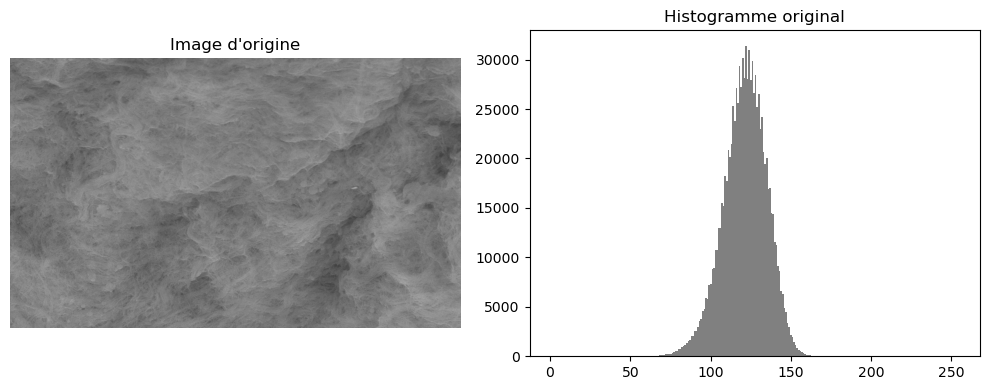

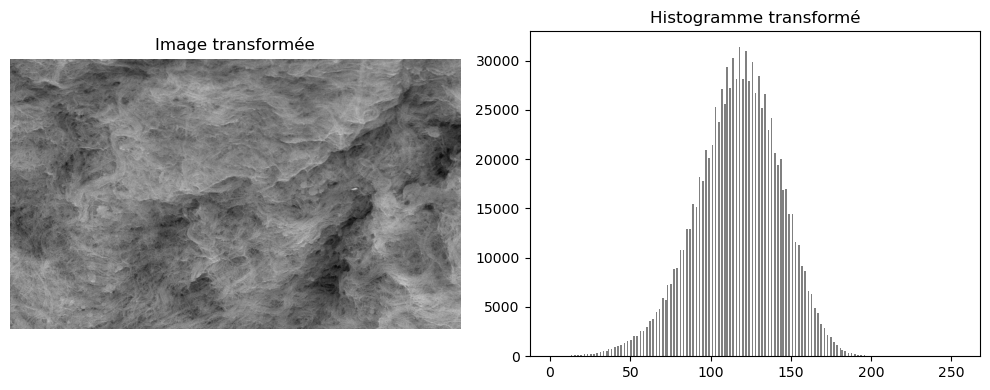

Image name : 060722-Nabila-JP-Valves-WholeMount-SAureus-pat02-28.tif
_________________________


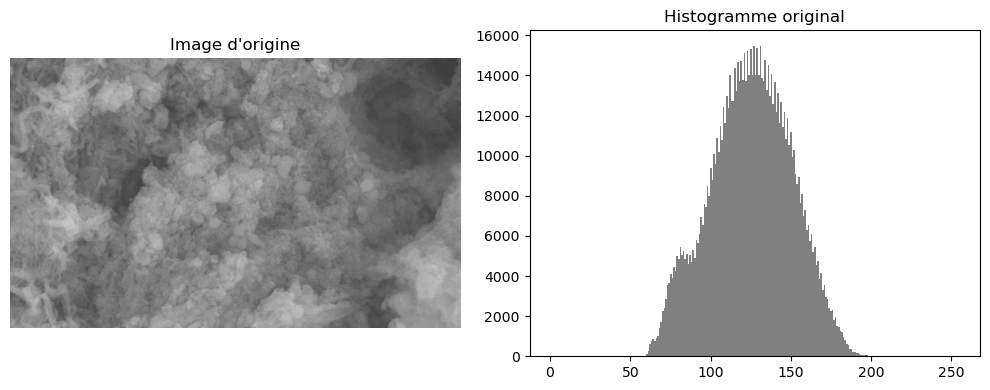

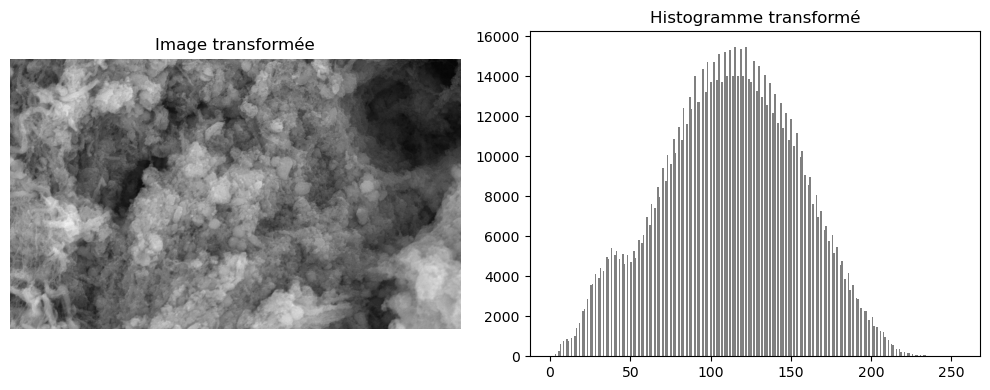

Image name : 070525-JPB-MEB-EIHNValves-Ech5-ZigZag0015.tif
_________________________


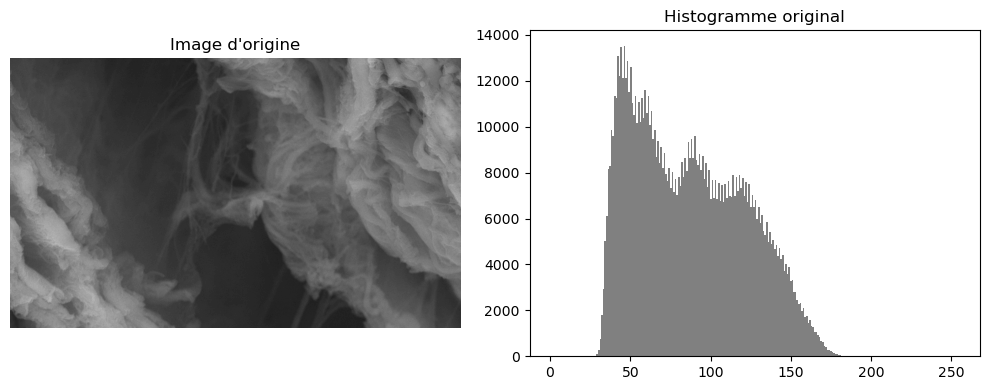

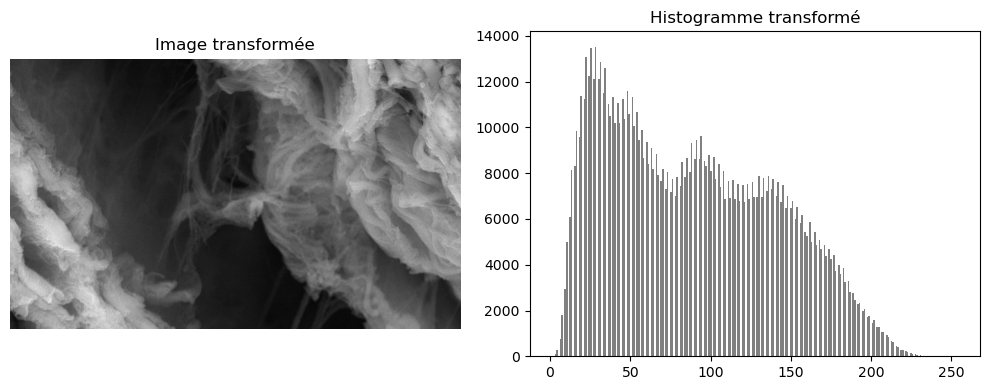

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0081.tif
_________________________


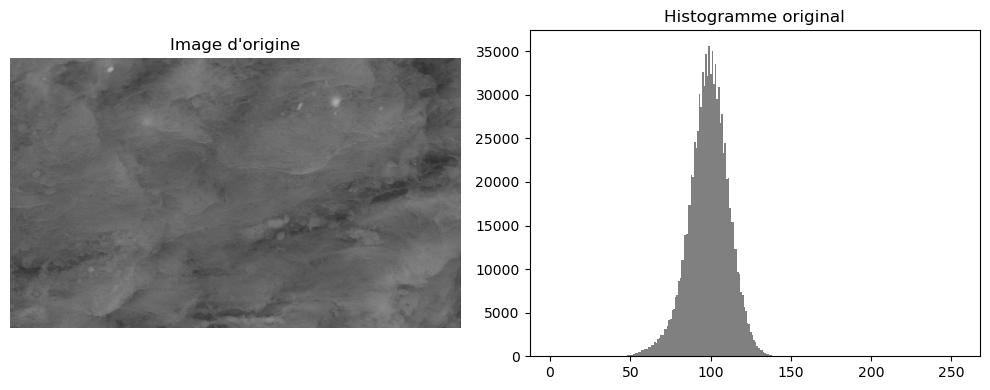

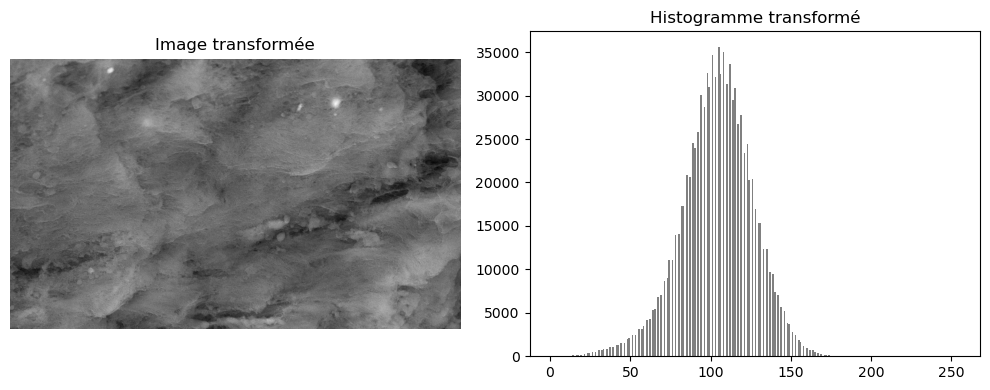

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0011.tif
_________________________


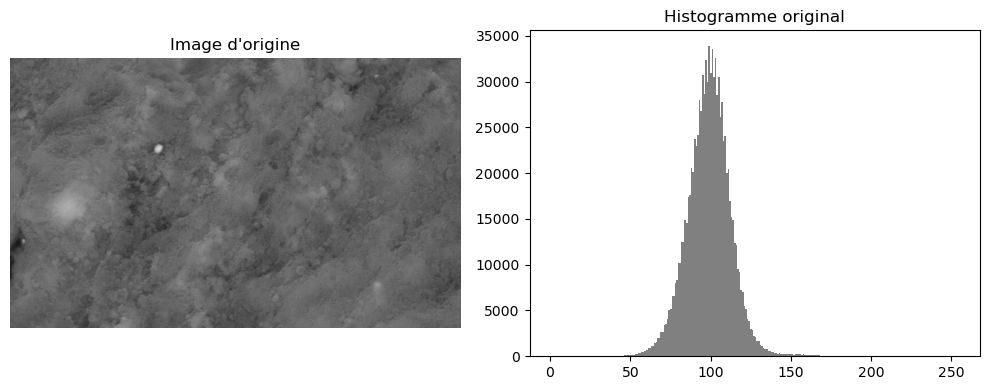

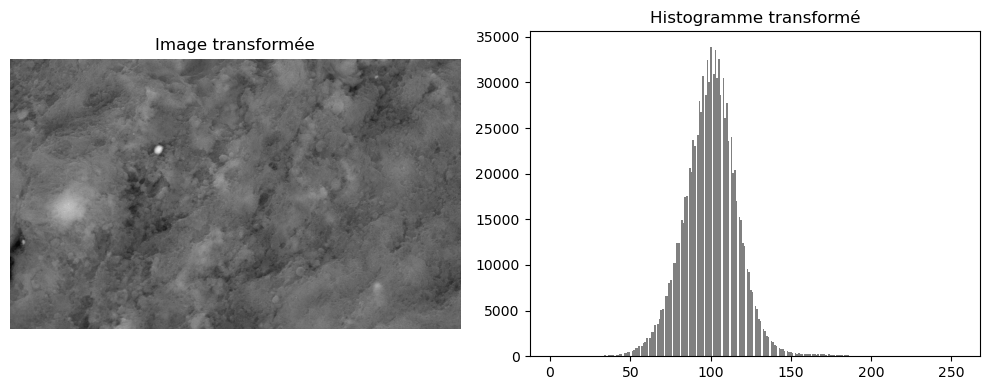

In [ ]:
import cv2

def histogram_stretching(img : np.ndarray):
 
        """ """
        
        min_val, max_val = np.min(img), np.max(img)
        result = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

        return Image.fromarray(result)

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image




plot_exemples(data_folder=data_folder,transform=histogram_stretching)

## Histogram equalization

Explications tirées de : https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html 

Image name : 070525-JPB-MEB-EIHNValves-Ech6-ZigZag0074.tif
_________________________


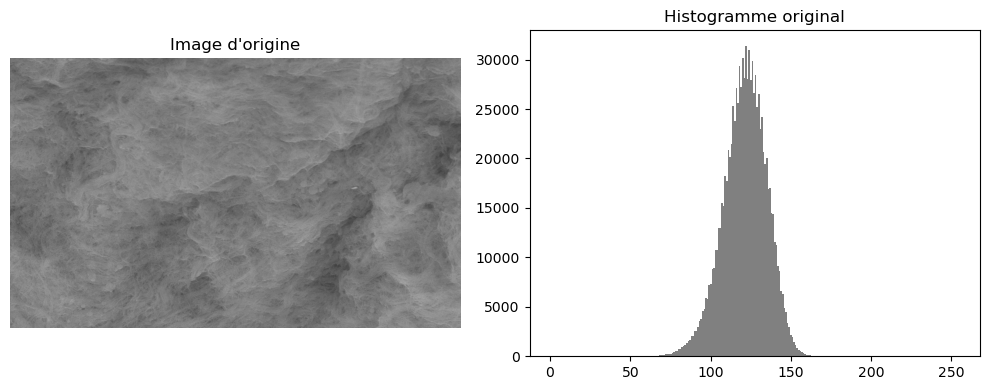

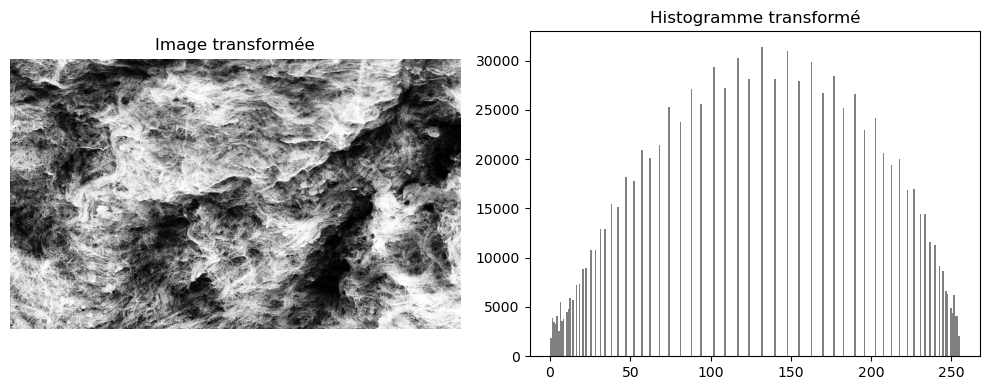

Image name : 060722-Nabila-JP-Valves-WholeMount-SAureus-pat02-28.tif
_________________________


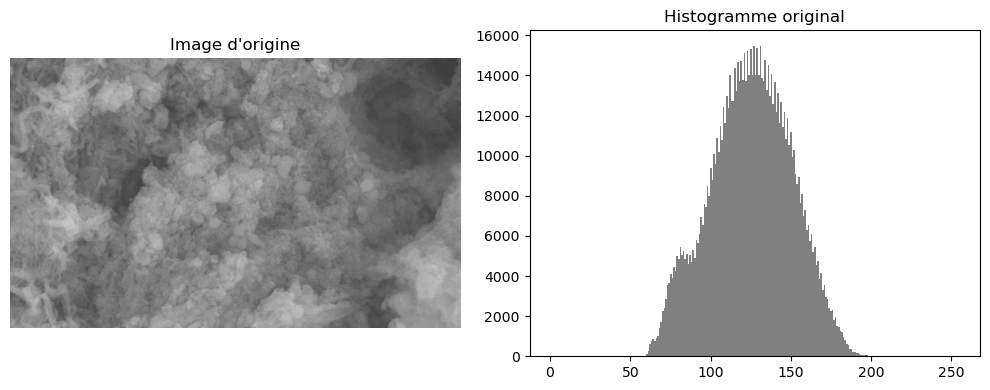

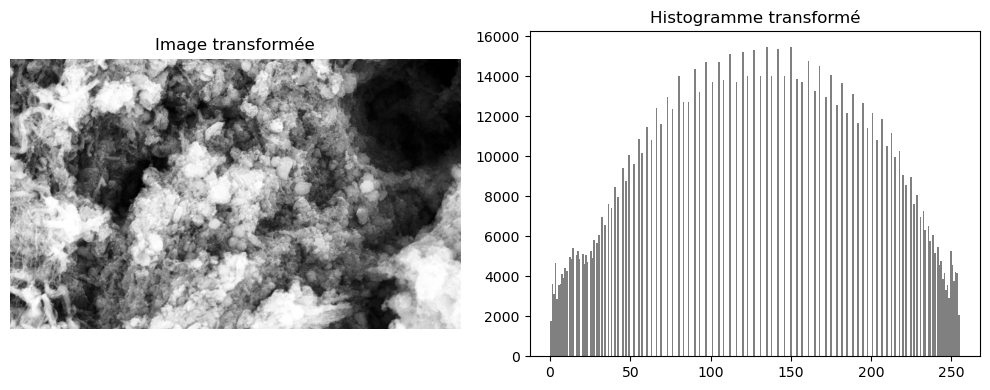

Image name : 070525-JPB-MEB-EIHNValves-Ech5-ZigZag0015.tif
_________________________


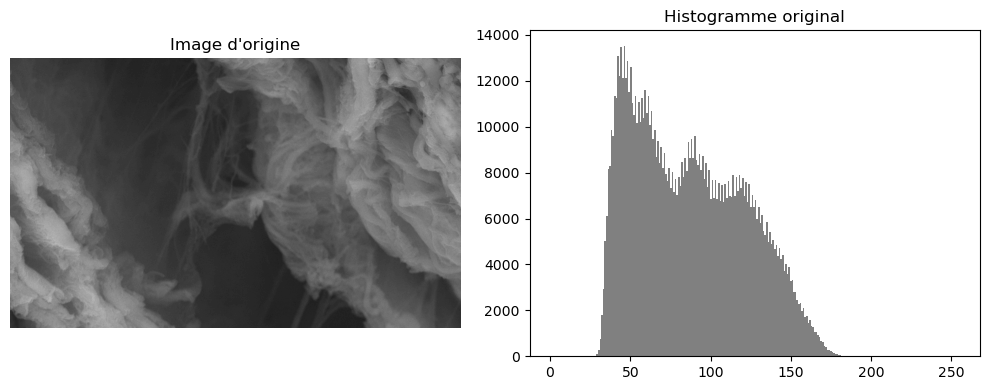

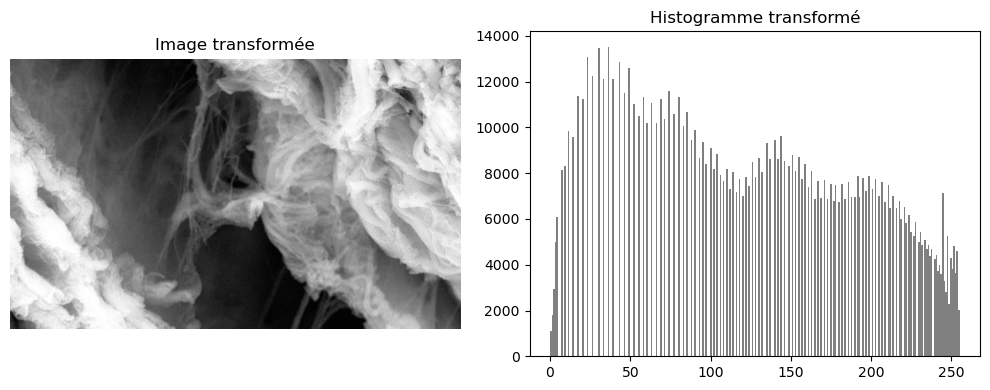

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0081.tif
_________________________


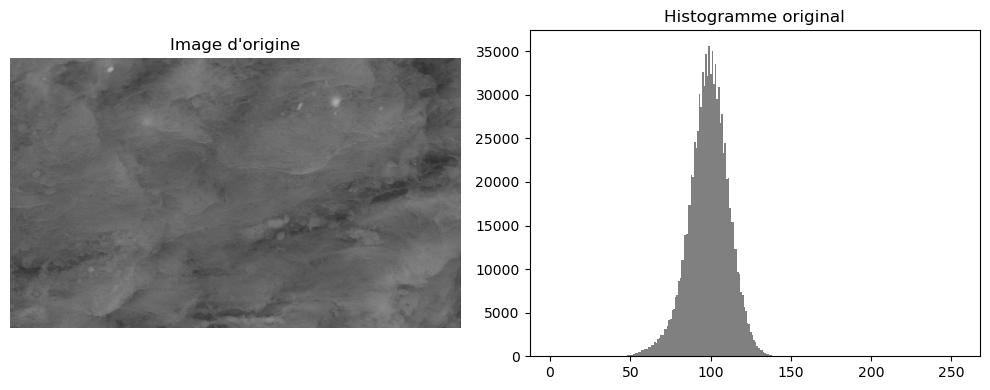

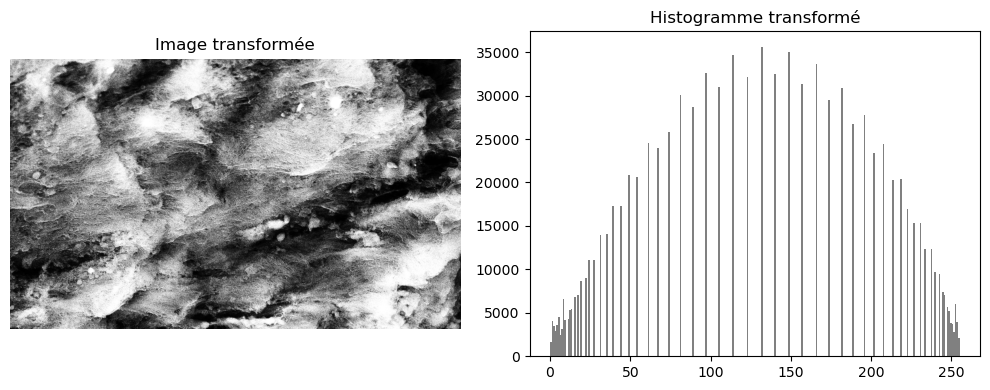

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0011.tif
_________________________


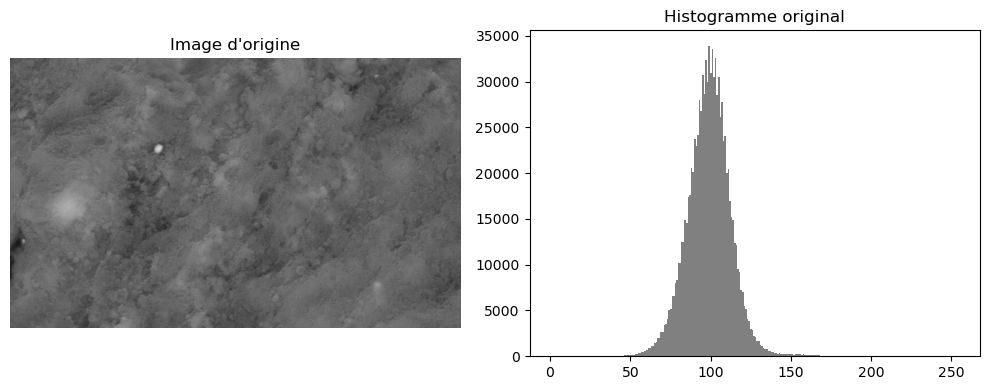

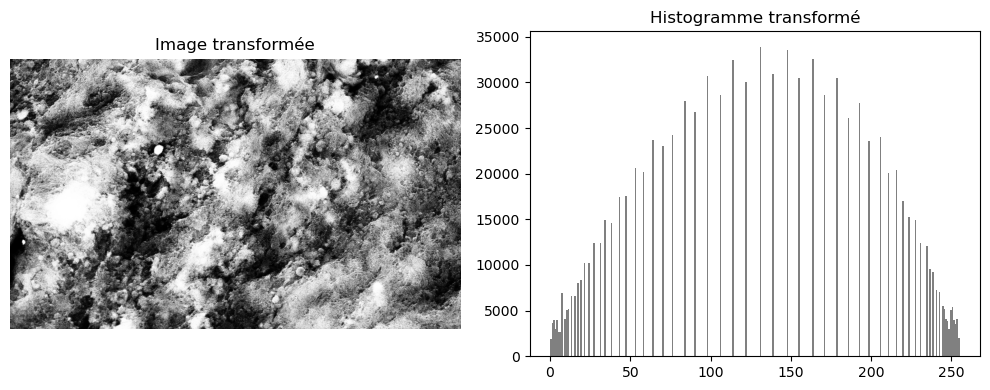

In [23]:
def equalizeHist(img : np.ndarray) :

    """   """
    result = cv2.equalizeHist(img)
    return result


plot_exemples(data_folder=data_folder,transform=equalizeHist)

## CLAHE - Tiled histogram normalisation 


Toujours le lien suivant : https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html 
Attention : Cette methode est pour moi dangereuse puisqu'elle procède à une égalisation de l'histogramme, mais des portions d'image de manière indépendante.


Image name : 070525-JPB-MEB-EIHNValves-Ech6-ZigZag0074.tif
_________________________


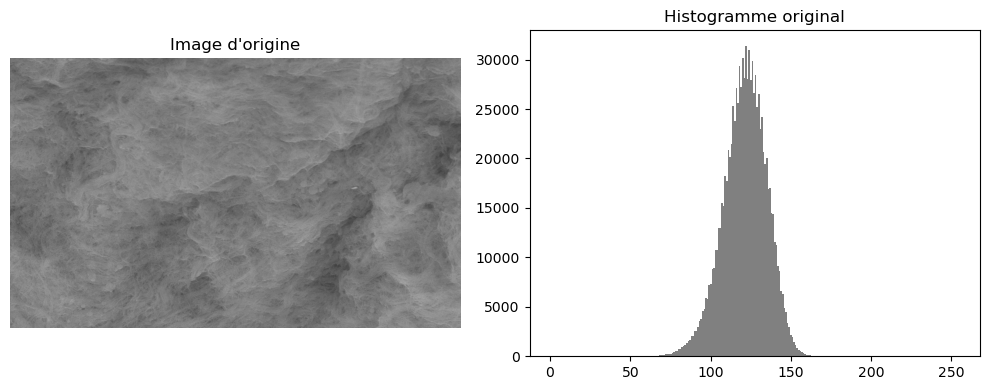

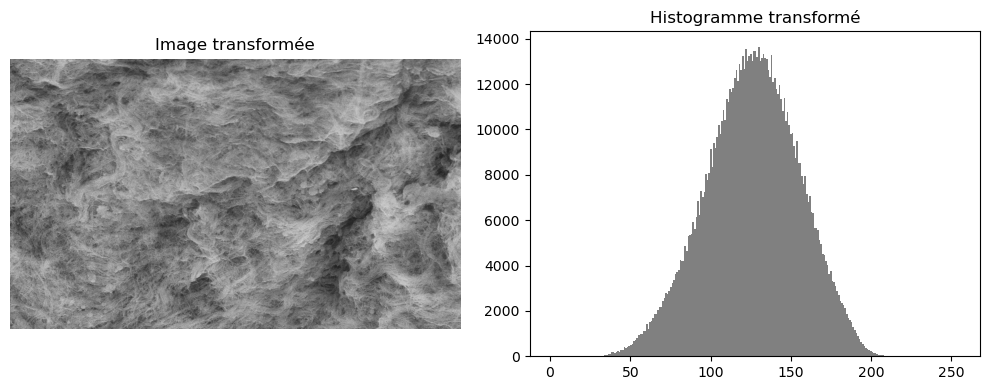

Image name : 060722-Nabila-JP-Valves-WholeMount-SAureus-pat02-28.tif
_________________________


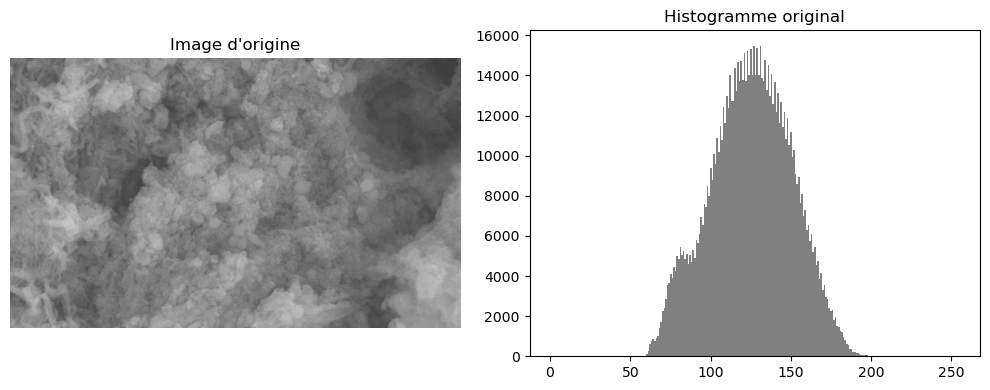

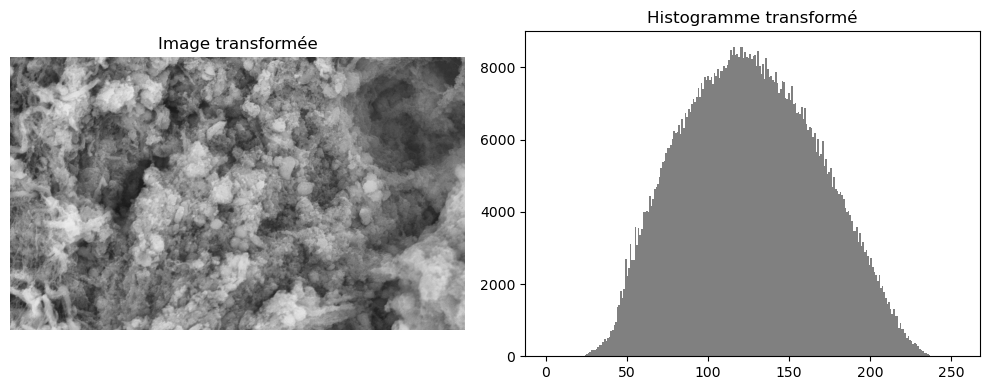

Image name : 070525-JPB-MEB-EIHNValves-Ech5-ZigZag0015.tif
_________________________


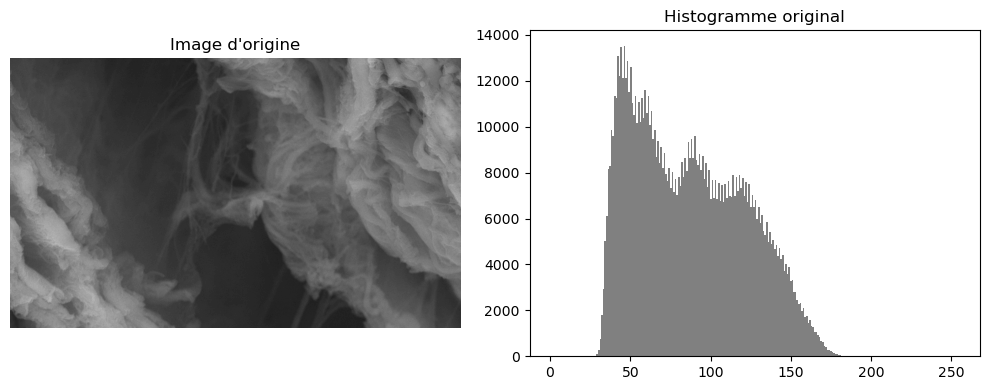

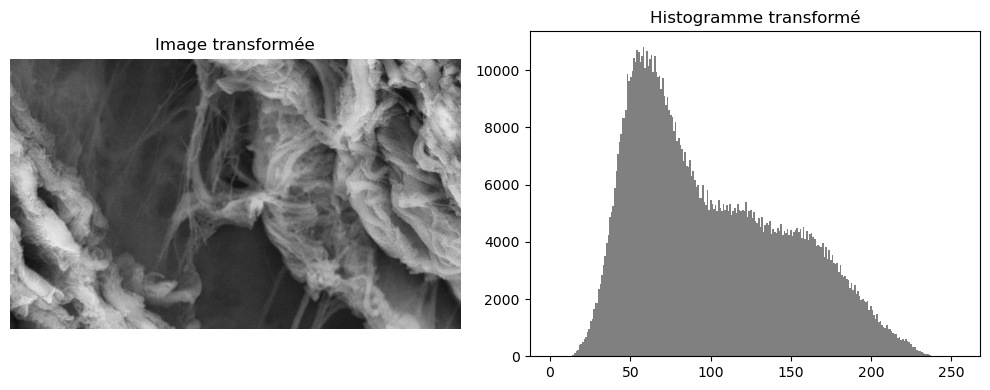

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0081.tif
_________________________


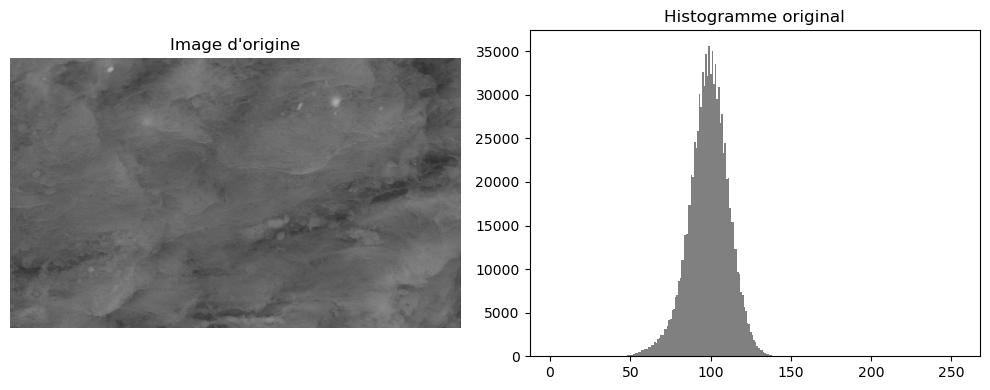

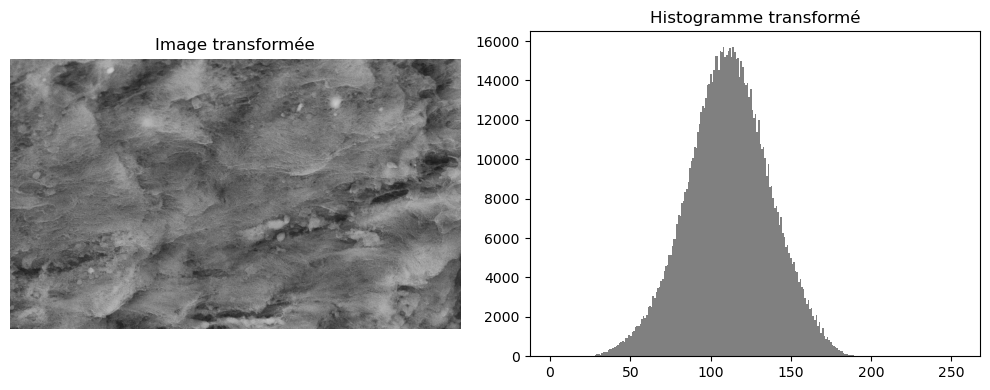

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0011.tif
_________________________


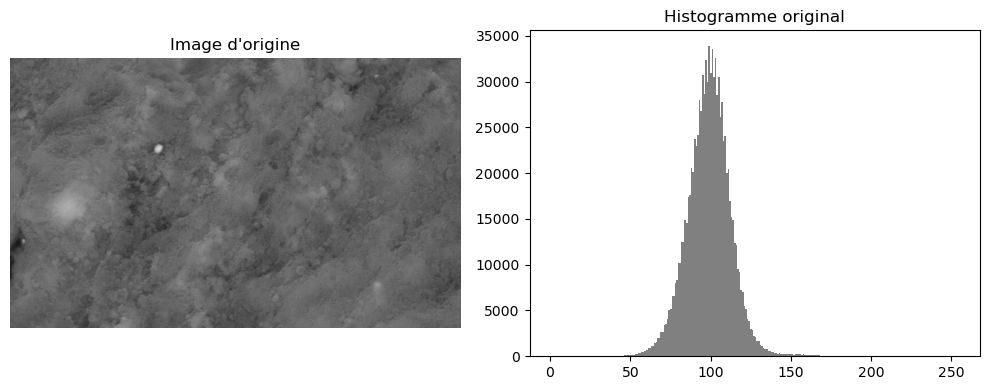

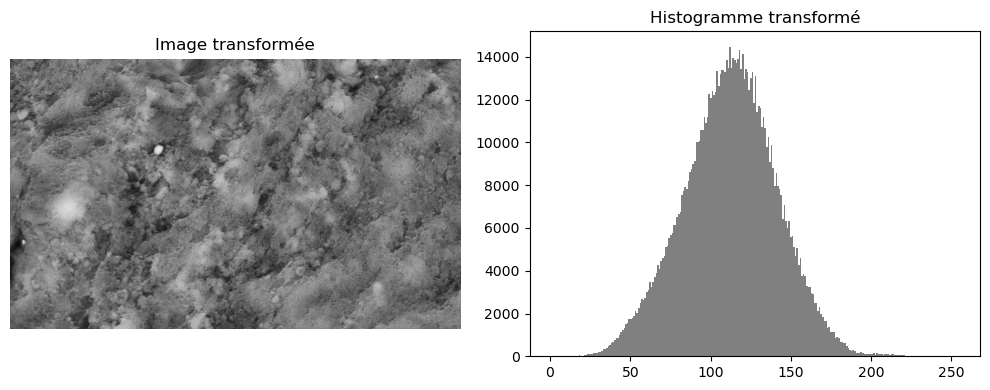

In [26]:
def CLAHE(img : np.array):

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    return Image.fromarray(cl1)


plot_exemples(data_folder=data_folder,transform=CLAHE)

## Normalisation 

L'idée est de fixer une moyenne (arbitrairement : 255/2=128) standard pour limiter le biais de l'intensité moyenne d'une image par rapport aux autres pour l'analyse de l'image 

$$
I_{\text{new}}(x, y) = \text{clip}\left( I(x, y) + \left( \mu_{\text{cible}} - \mu_{\text{originale}} \right),\ 0,\ 255 \right)
$$

où :
-  I(x, y) : intensité du pixel original
- $ \mu_{\text{originale}} $ : moyenne de l’image d’entrée
- $  \mu_{\text{cible}} $: moyenne souhaitée (ex. 128)
- `clip(…)` : limite les valeurs pour rester dans [0, 255]


Image name : 070525-JPB-MEB-EIHNValves-Ech6-ZigZag0074.tif
_________________________


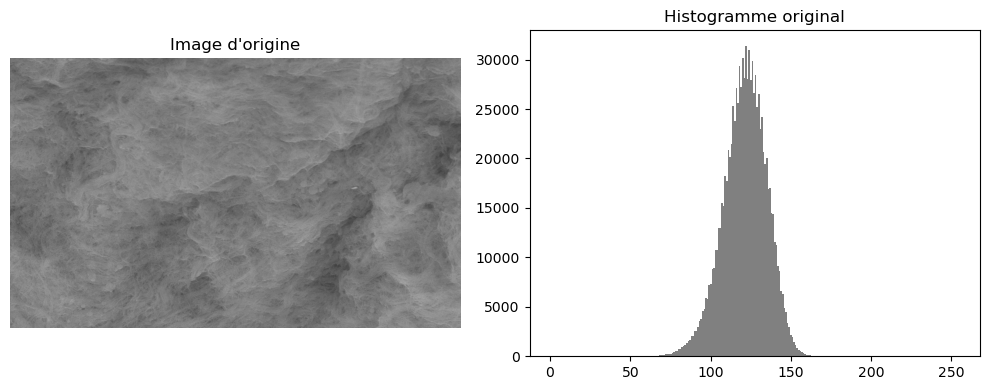

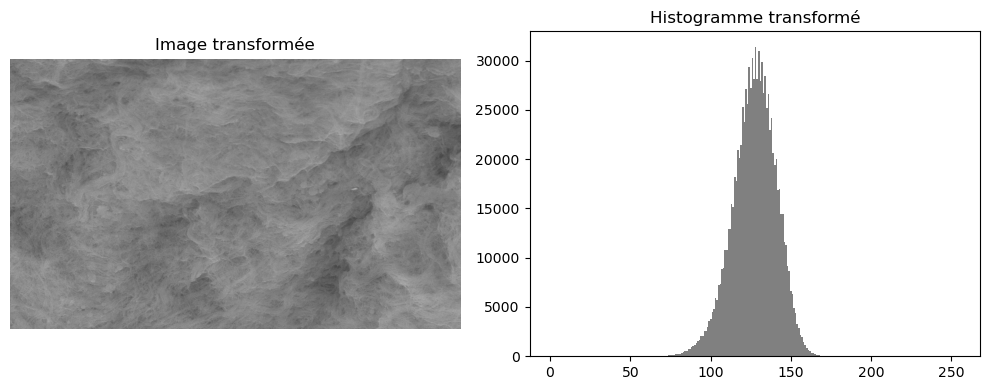

Image name : 060722-Nabila-JP-Valves-WholeMount-SAureus-pat02-28.tif
_________________________


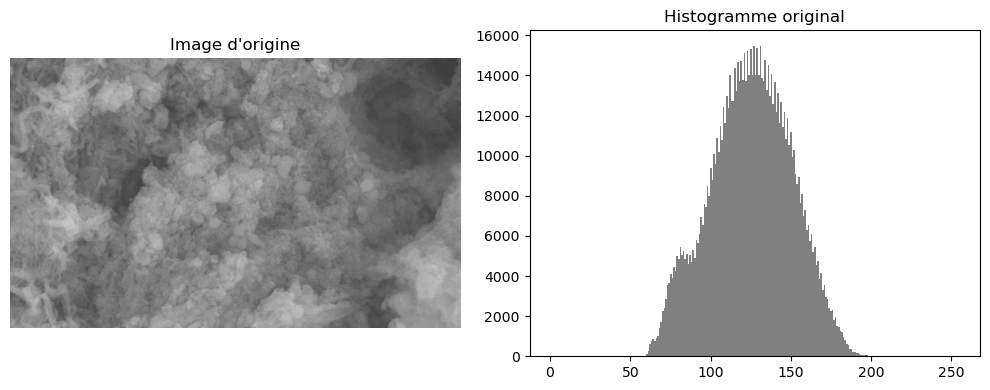

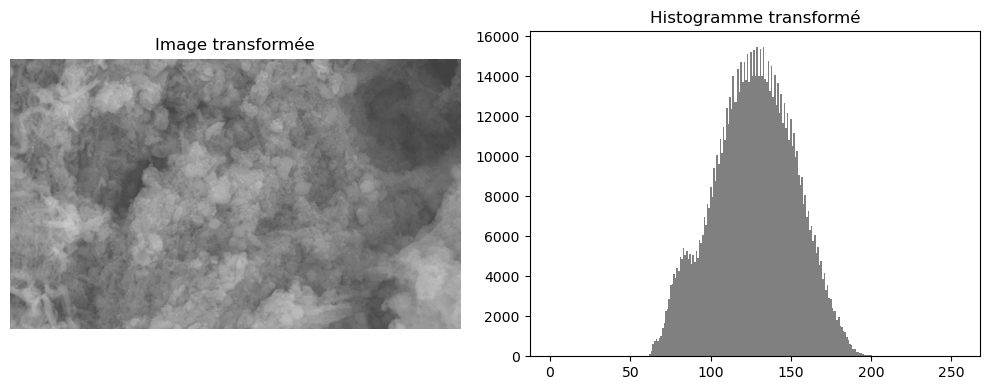

Image name : 070525-JPB-MEB-EIHNValves-Ech5-ZigZag0015.tif
_________________________


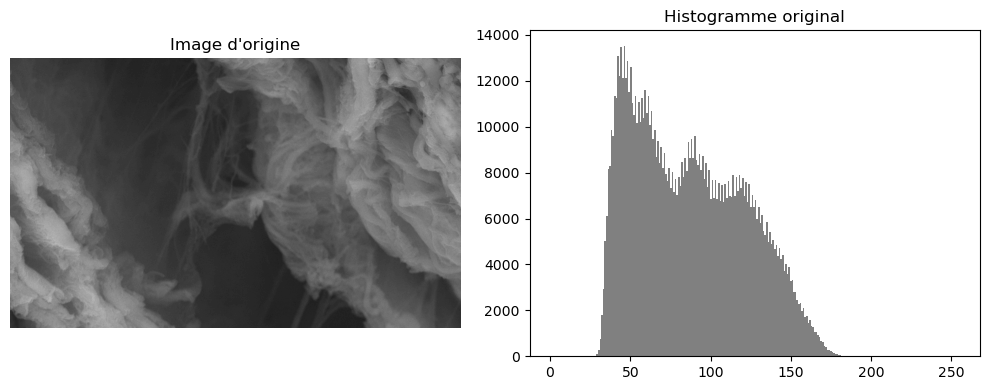

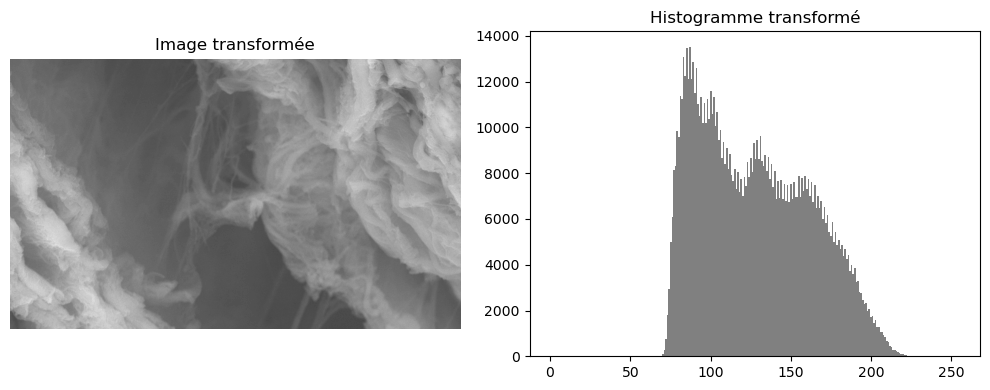

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0081.tif
_________________________


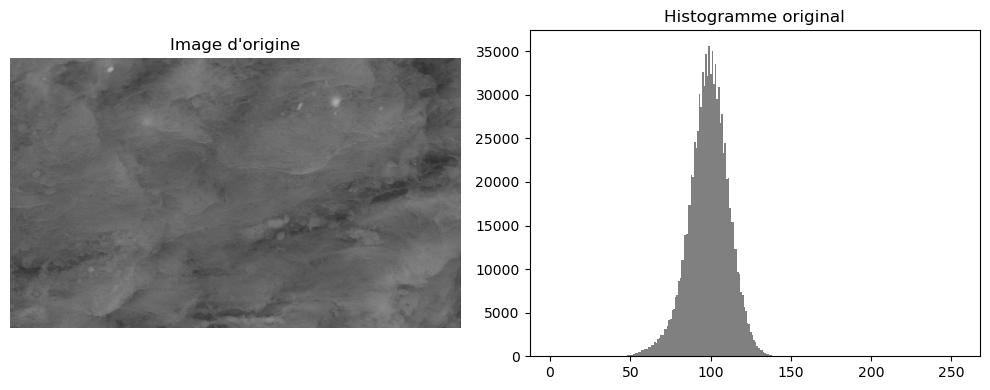

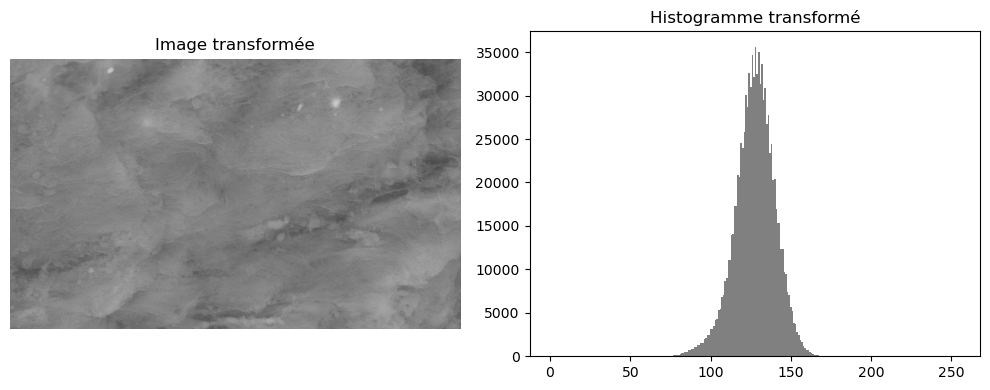

Image name : 070525-JPB-MEB-EIHNValves-Ech4-ZigZag0011.tif
_________________________


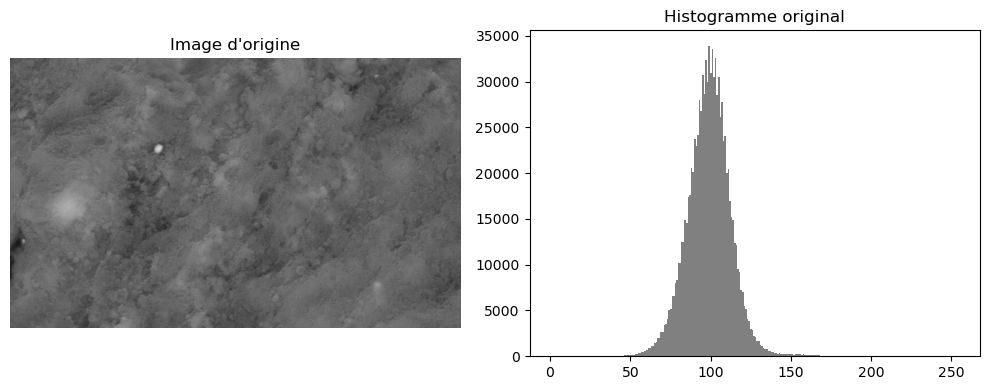

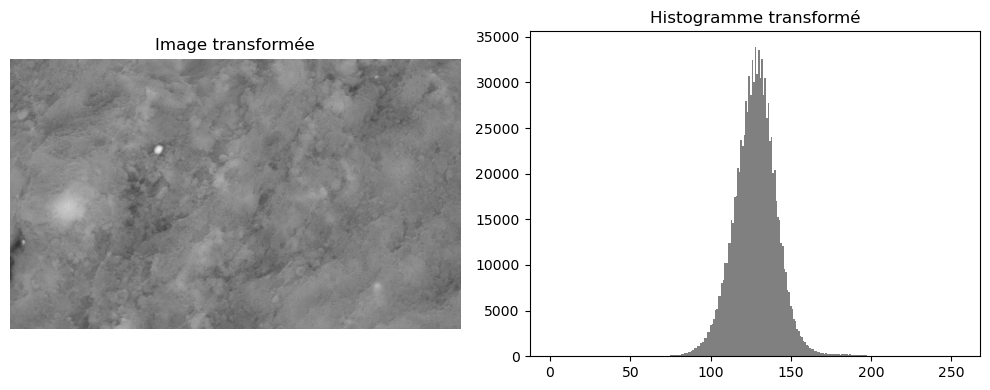

In [27]:


def normalize_to_mean(img : np.ndarray, target_mean=128):
  
    if img.ndim != 2:
        raise ValueError("Image doit être en niveaux de gris (2D).")

    img = img.astype(np.float32)
    mean_orig = np.mean(img)

    shift = target_mean - mean_orig
    img_norm = img + shift
    img_norm = np.clip(img_norm, 0, 255).astype(np.uint8)

    return Image.fromarray(img_norm)


plot_exemples(data_folder=data_folder,transform=normalize_to_mean)
